General Information

Download Libraries and Data

In [2222]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling as pp
%matplotlib inline

In [2223]:
import category_encoders as ce

In [2224]:
df = pd.read_excel('Need All Columns.xlsx')

Data Overview

In [2225]:
df.head()

,Housheold ID,Number of household members,Type of dwelling,Type of floor,Number of rooms in dwelling,Electricity in quarter/village,Main type of energy for cooking,Toilet facility,Privacy of toilet facility,Main source of water,...,Access to improved sanitation,Gender of household head,Age of household head,Highest level of education completed of household head,Electricity supply,Time spend on household tasks the day before,Time spend on household tasks last saturday,Time spend on household tasks last sunday,Agreement with statement among children aged 8 17 years I felt miserable or unhappy,Quintile of depression index for RSI respondent
0,1004_1324,1,Kay bas (House in concrete with sheet iron material with one level),Laid floor,1 room,Yes,Charcoal,Pit latrine with slab,Shared,Water bought by the gallon,...,No,Female,35-49,No education,"In village, but not in dwelling",NaN,NaN,NaN,NaN,NaN
1,1005_1313,2,"House in (plywood, wooden board) tin foof",Dirt floor,1 room,Yes,Charcoal,Pit latrine with slab,Shared,Water bought by the gallon,...,No,Female,35-49,Primary,"In village, but not in dwelling",NaN,NaN,NaN,NaN,NaN
2,1008_1322,5,Kay bas (House in concrete with sheet iron material with one level),Laid floor,2 rooms,Yes,Charcoal,Pit latrine with slab,Shared,Water bought by the gallon,...,No,Male,15-34,Primary,Connected to dwelling,NaN,NaN,NaN,NaN,NaN
3,101_1234,5,Kay bas (House in concrete with sheet iron material with one level),Laid floor,4 rooms,Yes,Charcoal,Pit latrine with slab,Shared,Other,...,No,Female,35-49,No education,Connected to dwelling,NaN,NaN,NaN,NaN,NaN
4,1013_1314,5,"House in (plywood, wooden board) tin foof",Laid floor,2 rooms,No,Charcoal,Pit latrine with slab,Shared,Water bought by the gallon,...,No,Male,50-64,Incomplete primary,No electricity,Less than 4 hours,Less than 4 hours,Less than 4 hours,NaN,NaN


In [2226]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.columns

Index(['housheold_id', 'number_of_household_members', 'type_of_dwelling',
       'type_of_floor', 'number_of_rooms_in_dwelling',
       'electricity_in_quarter/village', 'main_type_of_energy_for_cooking',
       'toilet_facility', 'privacy_of_toilet_facility', 'main_source_of_water',
       'food_supply_for_household_members', 'household_durables:_refrigerator',
       'household_durables:_sewing_machine', 'household_durables:_oven',
       'household_durables:_electric_fan', 'household_durables:_bed',
       'household_durables:_radio', 'household_durables:_television',
       'household_durables:_satellite_dish',
       'household_durables:_mobile_phone',
       'household_durables:_personal_computer',
       'household_durables:_video_camera',
       'household_durables:_internet_connection',
       'household_durables:_car_or_truck', 'household_durables:_motorbike',
       'household_durables:_bicycle', 'household_durables:_tablet/ipad',
       'sex_of_rsi_respondent', 'age_of_rsi_

In [2227]:
df = df.drop(['quintile_of_depression_index_for_rsi_respondent'], axis=1)

In [2228]:
df = df[pd.notnull(df['agreement_with_statement_among_children_aged_8_17_years_i_felt_miserable_or_unhappy'])]
df['agreement_with_statement_among_children_aged_8_17_years_i_felt_miserable_or_unhappy'].value_counts(dropna = False)

Not true          847
True              234
Sometimes true    225
Name: agreement_with_statement_among_children_aged_8_17_years_i_felt_miserable_or_unhappy, dtype: int64

We can gather some insights from the below overview:
-There are 3 types of variables in the data: Numeric, Text, and Categorical
    -Our target column is showing 'Unsupported', but we can ignore this.
-Every column except the target (because it was already cleaned) contains null values
    +We will revisit null values in more detail later an will determine which columns can be salvaged and which need to be removed
-More than 50% of children do not have access to improved sanitation or water
-Most children do have access to some or all resources for education
-As confirmed by the target column's name, only 8-17 year olds were included in the dataset
-The 'Access to Materials' columns all have a similar number of null values (likely related to current school attendance)
-We will need to revise a value in the type_of_floor column due to a data integrity issue (3 is not a legitimate response)
-Housheold ID represents each respondent. Because all values are unique, there is no risk of a household being counted multiple times

In [2229]:
pp.ProfileReport(df)

Number of variables,76
Number of observations,1306
Total Missing (%),4.4%
Total size in memory,775.5 KiB
Average record size in memory,608.1 B
Numeric,3
Categorical,71
Boolean,0
Date,0
Text (Unique),1
Rejected,0


Data Preparation

In [2230]:
df['currently_enrolled_in_school'].value_counts(dropna = False)

Yes    1019
No     287 
Name: currently_enrolled_in_school, dtype: int64

In [2231]:
pd.crosstab(df['access_to_text_books_for_classes'], [df.currently_enrolled_in_school])

currently_enrolled_in_school,Yes
access_to_text_books_for_classes,
Access to all books,280
Access to some books,593
Not access to any book,146


In [2232]:
pd.crosstab(df['access_to_materials_for_classes:_pens'], [df.currently_enrolled_in_school])

currently_enrolled_in_school,Yes
access_to_materials_for_classes:_pens,
Has,846
No,160


In [2233]:
df1 = df[['access_to_text_books_for_classes', 'access_to_materials_for_classes:_notebooks', 'access_to_materials_for_classes:_pencils',
       'access_to_materials_for_classes:_pens',
       'access_to_materials_for_classes:_eraser',
       'access_to_materials_for_classes:_school_bag',
       'access_to_materials_for_classes:_school_uniform',
       'access_to_materials_for_classes:_shoes']]

In [2234]:
for x in df1.columns:
    y = 'Not Enrolled'
    df[x] = df[x].fillna(y)

In [2235]:
pd.crosstab(df['access_to_text_books_for_classes'], [df.currently_enrolled_in_school])

currently_enrolled_in_school,No,Yes
access_to_text_books_for_classes,,
Access to all books,0,280
Access to some books,0,593
Not Enrolled,287,0
Not access to any book,0,146


In [2236]:
def replace(x):
    if x ==3:
        return None
    else:
        return x

In [2237]:
df.type_of_floor = df['type_of_floor'].apply(lambda x: replace(x))

In [2238]:
df.type_of_floor.value_counts(dropna = False)

Laid floor    837
Dirt floor    442
NaN           27 
Name: type_of_floor, dtype: int64

In [2239]:
df = df.drop(['privacy_of_toilet_facility', 'injury_during_domestic_work', 'born_in_current_household',
             'born_in_current_household'], axis=1)

In [2240]:
for x in df.columns:
    if x == 'housheold_id':
        pass
    else:
        y = df[x].mode().iloc[0]
        df[x] = df[x].fillna(y)

In [2241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 772 to 2077
Data columns (total 72 columns):
housheold_id                                                                           1306 non-null object
number_of_household_members                                                            1306 non-null int64
type_of_dwelling                                                                       1306 non-null object
type_of_floor                                                                          1306 non-null object
number_of_rooms_in_dwelling                                                            1306 non-null object
electricity_in_quarter/village                                                         1306 non-null object
main_type_of_energy_for_cooking                                                        1306 non-null object
toilet_facility                                                                        1306 non-null object
main_source_of_water        

Feature Engineering

In [2242]:
df['agreement_with_statement_among_children_aged_8_17_years_i_felt_miserable_or_unhappy'].value_counts()

Not true          847
True              234
Sometimes true    225
Name: agreement_with_statement_among_children_aged_8_17_years_i_felt_miserable_or_unhappy, dtype: int64

In [2243]:
def unhappiness(x):
    if x == True:
        return 1
    elif x == 'Sometimes true':
        return 2
    elif x == 'Not true':
        return 3

In [2244]:
df['agreement_with_statement_among_children_aged_8_17_years_i_felt_miserable_or_unhappy'] = df['agreement_with_statement_among_children_aged_8_17_years_i_felt_miserable_or_unhappy'].apply(lambda x: unhappiness(x))

In [2245]:
df['agreement_with_statement_among_children_aged_8_17_years_i_felt_miserable_or_unhappy'].value_counts()

3    847
1    234
2    225
Name: agreement_with_statement_among_children_aged_8_17_years_i_felt_miserable_or_unhappy, dtype: int64

In [2246]:
df = df.drop(['currently_enrolled_in_school'], axis=1)

In [2247]:
df2 = df

In [2248]:
df2 = df2.iloc[:,1:]

In [2249]:
ohe = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True)
df2 = ohe.fit_transform(df2)
df2.head()

,type_of_dwelling_Ajoupa (House build with vegetable materials),type_of_dwelling_Kay bas (House in concrete with sheet iron material with one level),type_of_dwelling_Kay a etaj (House in concrete with sheet iron material with two or more levels),type_of_dwelling_Kay atè (roof and walls merged),"type_of_dwelling_House in (plywood, wooden board) tin foof",type_of_dwelling_Taudis (House build with recuperated materials,type_of_dwelling_Other,type_of_dwelling_Apartment (house with several units),type_of_dwelling_Tent or Temporary shelter in camp,type_of_floor_Dirt floor,...,time_spend_on_household_tasks_last_saturday_From 4 up to 6 hours,time_spend_on_household_tasks_last_saturday_More than 8 hours,time_spend_on_household_tasks_last_sunday_Less than 4 hours,time_spend_on_household_tasks_last_sunday_From 4 up to 6 hours,time_spend_on_household_tasks_last_sunday_Did not,time_spend_on_household_tasks_last_sunday_From 6 up to 8 hours,time_spend_on_household_tasks_last_sunday_More than 8 hours,number_of_household_members,age_of_rsi_respondent,agreement_with_statement_among_children_aged_8_17_years_i_felt_miserable_or_unhappy
772,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,4,8.0,3
773,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,6,11.0,3
774,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,3,17.0,3
775,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,7,14.0,3
776,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,7,16.0,3


In [2250]:
df2 = df2.drop(['type_of_floor_Laid floor',
'number_of_rooms_in_dwelling_3 rooms',
'electricity_in_quarter/village_Yes',
'main_type_of_energy_for_cooking_Charcoal',
'toilet_facility_Pit latrine with slab',
'main_source_of_water_Water bought by the gallon',
'food_supply_for_household_members_Just enough',
'household_durables:_refrigerator_No',
'household_durables:_sewing_machine_No',
'household_durables:_oven_Has',
'household_durables:_electric_fan_Has',
'household_durables:_bed_No',
'household_durables:_radio_Has',
'household_durables:_television_No',
'household_durables:_satellite_dish_No',
'household_durables:_mobile_phone_No',
'household_durables:_personal_computer_Has',
'household_durables:_video_camera_Has',
'household_durables:_internet_connection_Has',
'household_durables:_car_or_truck_No',
'household_durables:_motorbike_No',
'household_durables:_bicycle_Has',
'household_durables:_tablet/ipad_Has',
'sex_of_rsi_respondent_Male',
'parents_in_household_None',
'work_in_household_after_8_pm_or_before_6_am_Never',
'ache_during_domestic_work_Always',
'capability_of_reading_and_writing_Literate',
'access_to_text_books_for_classes_Not Enrolled',
'access_to_materials_for_classes:_notebooks_Has',
'access_to_materials_for_classes:_pencils_Not Enrolled',
'access_to_materials_for_classes:_pens_Has',
'access_to_materials_for_classes:_eraser_Not Enrolled',
'access_to_materials_for_classes:_school_bag_No',
'access_to_materials_for_classes:_school_uniform_Not Enrolled',
'access_to_materials_for_classes:_shoes_Has',
'health_problem:_no_No',
'being_punished_by_household_members_Often',
'being_afraid_of_household_members_Never',
'time_to_get_up_compared_to_other_household_members_Before',
'place_to_sleep_Inside the house',
'objects_to_sleep_on_"Lit de fortune"',
'shareness_of_sleeping_place_Sleep alone',
'friends_in_the_same_age_in_community_No',
'frequency_to_meet_friends/play_outside_Every day',
'being_allowed_to_leave_house_alone_No',
'go_to_church_together_with_other_household_members_Always',
'number_of_meals_at_home_yesterday_3+',
'usually_eat_together_with_other_household_members_Yes',
'access_to_radio_Never',
'access_to_telephone_Sometimes',
'access_to_internet_Never',
'wealth_tertiles_Mid third',
'access_to_improved_water_source_No',
'gender_of_household_head_Female',
'age_of_household_head_35-49',
'highest_level_of_education_completed_of_household_head_Vocational training/Other',
'electricity_supply_Connected to dwelling',
'time_spend_on_household_tasks_the_day_before_More than 8 hours',
'time_spend_on_household_tasks_last_saturday_Less than 4 hours',
'time_spend_on_household_tasks_last_sunday_More than 8 hours'], axis=1)



In [2251]:
focus_col = ['agreement_with_statement_among_children_aged_8_17_years_i_felt_miserable_or_unhappy']
corr = df2.corr().filter(focus_col).drop(focus_col)
corr['agreement_with_statement_among_children_aged_8_17_years_i_felt_miserable_or_unhappy'] = corr['agreement_with_statement_among_children_aged_8_17_years_i_felt_miserable_or_unhappy'].apply(lambda x: abs(x))
corr = corr.sort_values(by=['agreement_with_statement_among_children_aged_8_17_years_i_felt_miserable_or_unhappy'],ascending=False)
corr

,agreement_with_statement_among_children_aged_8_17_years_i_felt_miserable_or_unhappy
ache_during_domestic_work_Never,0.214766
health_problem:_no_Yes,0.196552
number_of_meals_at_home_yesterday_1,0.171055
injury_from_punishment:_no_Had,0.167925
injury_from_punishment:_no_No,0.167925
being_afraid_of_household_members_Always,0.162143
usually_eat_together_with_other_household_members_No,0.159397
go_to_church_together_with_other_household_members_Never,0.149956
age_of_rsi_respondent,0.147487
access_to_text_books_for_classes_Access to all books,0.130649


In [2252]:
corr1 = corr[corr['agreement_with_statement_among_children_aged_8_17_years_i_felt_miserable_or_unhappy']>=.08 ]
corr1 = corr1.iloc[:,1:]
corr1 = corr1.reset_index()
corr2 = []
for x in corr1['index']:
    corr2.append(x)
    
corr2 = sorted(corr2)
corr2

['access_to_materials_for_classes:_pencils_Has',
 'access_to_materials_for_classes:_pencils_No',
 'access_to_text_books_for_classes_Access to all books',
 'access_to_text_books_for_classes_Not access to any book',
 'ache_during_domestic_work_Never',
 'ache_during_domestic_work_Often',
 'ache_during_domestic_work_Sometimes',
 'age_of_rsi_respondent',
 'being_afraid_of_household_members_Always',
 'food_supply_for_household_members_Less than enough',
 'frequency_to_meet_friends/play_outside_One day per week or less',
 'go_to_church_together_with_other_household_members_Never',
 'health_problem:_no_Yes',
 'injury_from_punishment:_no_Had',
 'injury_from_punishment:_no_No',
 'number_of_meals_at_home_yesterday_1',
 'sex_of_rsi_respondent_Female',
 'time_spend_on_household_tasks_last_saturday_More than 8 hours',
 'time_spend_on_household_tasks_last_sunday_From 4 up to 6 hours',
 'usually_eat_together_with_other_household_members_No',
 'work_in_household_after_8_pm_or_before_6_am_Always',
 'wor

In [2253]:
df_final = df2[['access_to_materials_for_classes:_pencils_Has',
 'access_to_materials_for_classes:_pencils_No',
 'access_to_text_books_for_classes_Access to all books',
 'access_to_text_books_for_classes_Not access to any book',
 'ache_during_domestic_work_Never',
 'ache_during_domestic_work_Often',
 'ache_during_domestic_work_Sometimes',
 'age_of_rsi_respondent',
 'being_afraid_of_household_members_Always',
 'food_supply_for_household_members_Less than enough',
 'frequency_to_meet_friends/play_outside_One day per week or less',
 'go_to_church_together_with_other_household_members_Never',
 'health_problem:_no_Yes',
 'injury_from_punishment:_no_Had',
 'injury_from_punishment:_no_No',
 'number_of_meals_at_home_yesterday_1',
 'sex_of_rsi_respondent_Female',
 'time_spend_on_household_tasks_last_saturday_More than 8 hours',
 'time_spend_on_household_tasks_last_sunday_From 4 up to 6 hours',
 'usually_eat_together_with_other_household_members_No',
 'work_in_household_after_8_pm_or_before_6_am_Always',
 'work_in_household_after_8_pm_or_before_6_am_Sometimes'
,               'agreement_with_statement_among_children_aged_8_17_years_i_felt_miserable_or_unhappy']]

In [2254]:
a = df_final.shape[1]-1
a

22

In [2255]:
X = df_final.iloc[:,:a]
Y = df_final.iloc[:,a:]

In [2256]:
X.head()

,access_to_materials_for_classes:_pencils_Has,access_to_materials_for_classes:_pencils_No,access_to_text_books_for_classes_Access to all books,access_to_text_books_for_classes_Not access to any book,ache_during_domestic_work_Never,ache_during_domestic_work_Often,ache_during_domestic_work_Sometimes,age_of_rsi_respondent,being_afraid_of_household_members_Always,food_supply_for_household_members_Less than enough,...,health_problem:_no_Yes,injury_from_punishment:_no_Had,injury_from_punishment:_no_No,number_of_meals_at_home_yesterday_1,sex_of_rsi_respondent_Female,time_spend_on_household_tasks_last_saturday_More than 8 hours,time_spend_on_household_tasks_last_sunday_From 4 up to 6 hours,usually_eat_together_with_other_household_members_No,work_in_household_after_8_pm_or_before_6_am_Always,work_in_household_after_8_pm_or_before_6_am_Sometimes
772,1,0,0,0,0,1,0,8.0,0,1,...,0,0,1,0,1,0,0,1,0,1
773,0,0,0,0,1,0,0,11.0,0,0,...,0,1,0,0,1,0,1,0,0,0
774,1,0,1,0,1,0,0,17.0,0,0,...,0,1,0,0,0,0,0,0,0,0
775,1,0,0,0,1,0,0,14.0,0,1,...,1,1,0,0,0,0,0,1,0,0
776,0,0,0,0,0,0,1,16.0,0,1,...,1,0,1,0,1,0,0,1,0,0


In [2257]:
Y.head()

,agreement_with_statement_among_children_aged_8_17_years_i_felt_miserable_or_unhappy
772,3
773,3
774,3
775,3
776,3


Modeling

In [2365]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

In [2366]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [2367]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [2368]:
y_pred = classifier.predict(X_test)

In [2369]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 15,   3,  39],
       [  9,   4,  46],
       [ 16,   1, 194]])

In [2370]:
c, r = y_train.shape
y_train = y_train.values.reshape(c,)

In [2371]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
stdev = accuracies.std()
mean = accuracies.mean()

In [2372]:
accuracy = 'Logistic Regression accuracy is %d and Std Dev is %d.'

In [2373]:
print(accuracy % (int(mean*100), stdev*100))

Logistic Regression accuracy is 66 and Std Dev is 2.


In [2374]:
from sklearn.model_selection import GridSearchCV

In [2375]:
parameters = [{'C': [.01, .2, .56, 1, 10, 100, 1000]}]

In [2376]:
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [2377]:
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [2378]:
best_parameters

{'C': 0.01}

In [2379]:
best_accuracy 

0.67722165474974461

In [2380]:
accuracy = 'Optimal Logistic Regression accuracy is %d'

In [2381]:
print(accuracy % (int(best_accuracy*100)))

Optimal Logistic Regression accuracy is 67


In [2382]:
pd.set_option('display.max_colwidth', -1)

In [2383]:
Log_Regress_coef = pd.DataFrame({"Feature":X.columns,"Coefficients":np.transpose(classifier.coef_[0, ])})
Log_Regress_coef['Coefficients']  = Log_Regress_coef['Coefficients'].apply(lambda x: abs(x))
Log_Regress_coef = Log_Regress_coef.sort_values(by=['Coefficients'],ascending=False)
Log_Regress_coef = Log_Regress_coef.reset_index()
Log_Regress_coef = Log_Regress_coef[['Feature', 'Coefficients']]
Log_Regress_coef

,Feature,Coefficients
0,go_to_church_together_with_other_household_members_Never,0.394480
1,health_problem:_no_Yes,0.358687
2,food_supply_for_household_members_Less than enough,0.332554
3,being_afraid_of_household_members_Always,0.246389
4,sex_of_rsi_respondent_Female,0.244196
5,age_of_rsi_respondent,0.208577
6,number_of_meals_at_home_yesterday_1,0.200918
7,access_to_materials_for_classes:_pencils_No,0.169215
8,usually_eat_together_with_other_household_members_No,0.152102
9,frequency_to_meet_friends/play_outside_One day per week or less,0.137829


In [2384]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

In [2385]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [2386]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [2387]:
y_pred = classifier.predict(X_test)

In [2388]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[  9,   4,  33],
       [ 10,   5,  44],
       [ 24,   9, 189]])

In [2389]:
c, r = y_train.shape
y_train = y_train.values.reshape(c,)

In [2390]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
stdev = accuracies.std()
mean = accuracies.mean()

In [2391]:
accuracy = 'K-Nearest Neighbors accuracy is %d and Std Dev is %d.'

In [2392]:
print(accuracy % (int(mean*100), stdev*100))

K-Nearest Neighbors accuracy is 58 and Std Dev is 3.


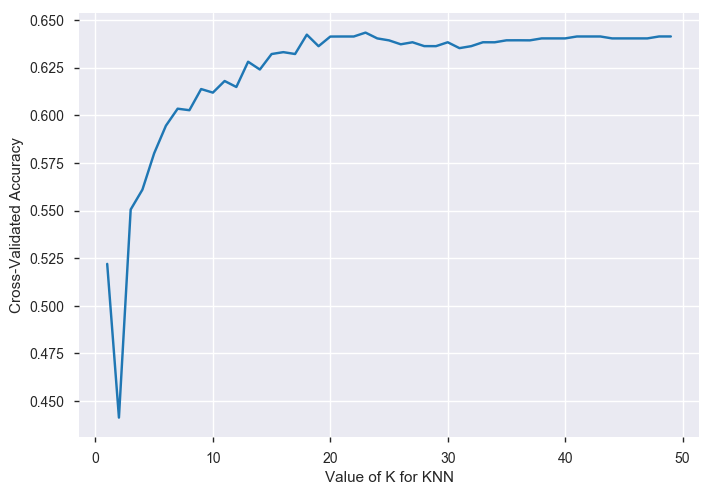

In [2393]:
k_range = range(1, 50)

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2)
    classifier.fit(X_train, y_train)
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    stdev = accuracies.std()
    mean = accuracies.mean()
    k_scores.append(mean)
    
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

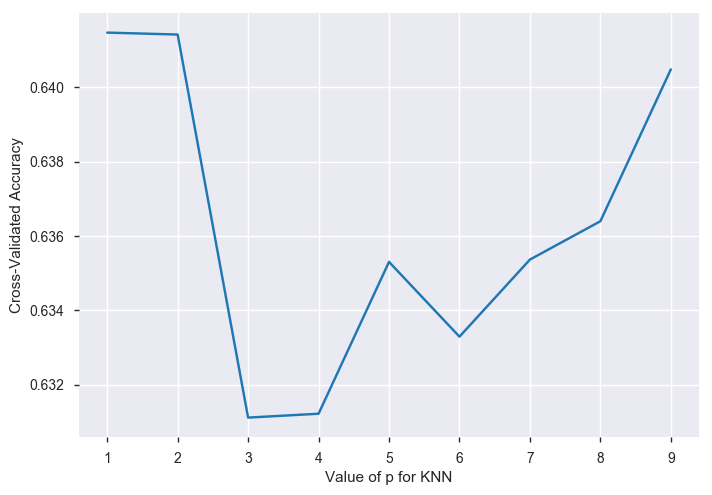

In [2394]:
k_range = range(1, 10)

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = 20, metric = 'minkowski', p = k)
    classifier.fit(X_train, y_train)
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    stdev = accuracies.std()
    mean = accuracies.mean()
    k_scores.append(mean)
    
plt.plot(k_range, k_scores)
plt.xlabel('Value of p for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [2395]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 20, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

In [2396]:
y_pred = classifier.predict(X_test)

In [2397]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[  3,   0,  43],
       [  1,   1,  57],
       [  0,   0, 222]])

In [2398]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
stdev = accuracies.std()
mean = accuracies.mean()

In [2399]:
accuracy = 'Optimal K-Nearest Neighbors accuracy is %d and Std Dev is %d.'

In [2400]:
print(accuracy % (int(mean*100), stdev*100))

Optimal K-Nearest Neighbors accuracy is 64 and Std Dev is 1.


In [2401]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

In [2402]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [2403]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear',C = 1, random_state = 0)
classifier.fit(X_train, y_train)

/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [2404]:
y_pred = classifier.predict(X_test)

In [2405]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[  2,   0,  66],
       [  1,   0,  50],
       [  4,   0, 204]])

In [2406]:
c, r = y_train.shape
y_train = y_train.values.reshape(c,)

In [2407]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
stdev = accuracies.std()
mean = accuracies.mean()

In [2408]:
accuracy = 'SVM accuracy is %d and Std Dev is %d.'

In [2409]:
print(accuracy % (int(mean*100), stdev*100))

SVM accuracy is 64 and Std Dev is 1.


In [2410]:
'''
From sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
'''


"\nFrom sklearn.model_selection import GridSearchCV\nparameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},\n              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]\ngrid_search = GridSearchCV(estimator = classifier,\n                           param_grid = parameters,\n                           scoring = 'accuracy',\n                           cv = 10,\n                           n_jobs = -1)\ngrid_search = grid_search.fit(X_train, y_train)\nbest_accuracy = grid_search.best_score_\nbest_parameters = grid_search.best_params_\n"

In [2411]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

In [2412]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [2413]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [2414]:
y_pred = classifier.predict(X_test)

In [2415]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[  5,   4,  50],
       [  7,   1,  53],
       [  5,   0, 202]])

In [2416]:
c, r = y_train.shape
y_train = y_train.values.reshape(c,)

In [2417]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
stdev = accuracies.std()
mean = accuracies.mean()

In [2418]:
accuracy = 'Kernel SVM accuracy is %d and Std Dev is %d.'

In [2419]:
print(accuracy % (int(mean*100), stdev*100))

Kernel SVM accuracy is 65 and Std Dev is 0.


In [2420]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

In [2421]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [2422]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None)

In [2423]:
y_pred = classifier.predict(X_test)

In [2424]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 14,  12,  30],
       [ 16,  10,  36],
       [ 28,  24, 157]])

In [2425]:
c, r = y_train.shape
y_train = y_train.values.reshape(c,)

In [2426]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
stdev = accuracies.std()
mean = accuracies.mean()

In [2427]:
accuracy = 'Naive Bayes accuracy is %d and Std Dev is %d.'

In [2428]:
print(accuracy % (int(mean*100), stdev*100))

Naive Bayes accuracy is 60 and Std Dev is 4.


In [2429]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

In [2430]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [2431]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [2432]:
y_pred = classifier.predict(X_test)

In [2433]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 16,   8,  24],
       [ 11,  13,  34],
       [ 35,  48, 138]])

In [2434]:
c, r = y_train.shape
y_train = y_train.values.reshape(c,)

In [2435]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
stdev = accuracies.std()
mean = accuracies.mean()

In [2436]:
accuracy = 'Decision Tree accuracy is %d and Std Dev is %d.'

In [2437]:
print(accuracy % (int(mean*100), stdev*100))

Decision Tree accuracy is 52 and Std Dev is 4.


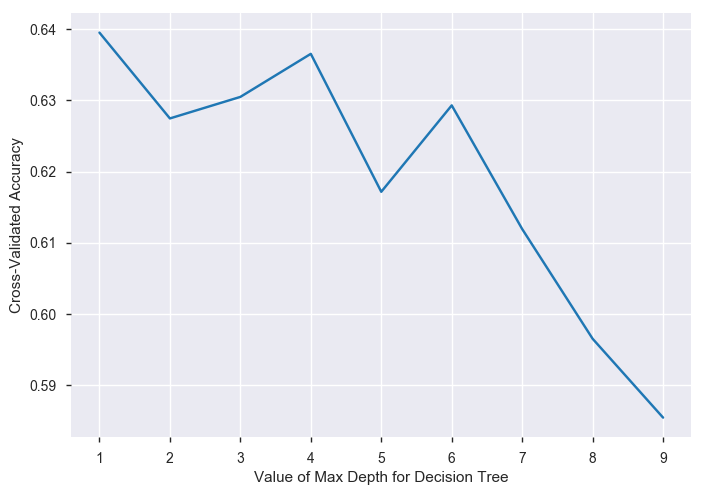

In [2438]:
tree_range = range(0, 10)

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth=k)
    classifier.fit(X_train, y_train)
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    stdev = accuracies.std()
    mean = accuracies.mean()
    k_scores.append(mean)
    
plt.plot(k_range, k_scores)
plt.xlabel('Value of Max Depth for Decision Tree')
plt.ylabel('Cross-Validated Accuracy')

In [2439]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth=1)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [2440]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
stdev = accuracies.std()
mean = accuracies.mean()

In [2441]:
accuracy = 'Optimal Decision Tree accuracy is %d and Std Dev is %d.'

In [2442]:
print(accuracy % (int(mean*100), stdev*100))

Optimal Decision Tree accuracy is 63 and Std Dev is 0.


In [2443]:
column_labels = X.columns.tolist()
coef = classifier.feature_importances_.squeeze().tolist()
DTree_coef = list(zip(column_labels, coef))
DTree_coef.sort(key=lambda x: abs(x[1]), reverse=True)
DTree_coef = pd.DataFrame(labels_coef)
DTree_coef = DTree_coef.rename(columns={labels_coef.columns[0]: 'Feature'})
DTree_coef = DTree_coef.rename(columns={labels_coef.columns[1]: 'Coefficient'})
DTree_coef

,Feature,Coefficient
0,age_of_rsi_respondent,0.143890
1,being_afraid_of_household_members_Always,0.083405
2,sex_of_rsi_respondent_Female,0.081782
3,go_to_church_together_with_other_household_members_Never,0.053457
4,food_supply_for_household_members_Less than enough,0.052902
5,time_spend_on_household_tasks_last_sunday_From 4 up to 6 hours,0.050516
6,ache_during_domestic_work_Never,0.050248
7,health_problem:_no_Yes,0.048436
8,usually_eat_together_with_other_household_members_No,0.047901
9,access_to_text_books_for_classes_Access to all books,0.045644


In [2444]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

In [2445]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [2446]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [2447]:
y_pred = classifier.predict(X_test)

In [2448]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 15,  11,  28],
       [ 18,   9,  31],
       [ 20,  26, 169]])

In [2449]:
c, r = y_train.shape
y_train = y_train.values.reshape(c,)

In [2450]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
stdev = accuracies.std()
mean = accuracies.mean()

In [2451]:
accuracy = 'Random Forest accuracy is %d and Std Dev is %d.'

In [2452]:
print(accuracy % (int(mean*100), stdev*100))

Random Forest accuracy is 59 and Std Dev is 3.


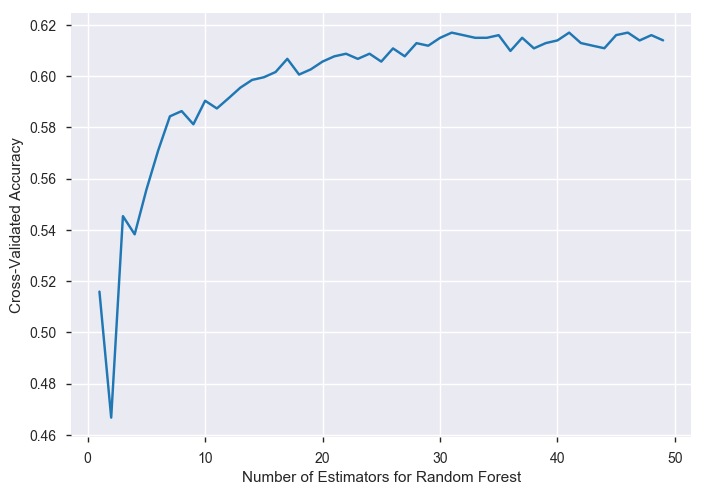

In [2453]:
forest_range = range(1, 50)

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for k in forest_range:
    classifier = RandomForestClassifier(n_estimators = k, criterion = 'entropy', random_state = 0)
    classifier.fit(X_train, y_train)
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    stdev = accuracies.std()
    mean = accuracies.mean()
    k_scores.append(mean)
    
plt.plot(forest_range, k_scores)
plt.xlabel('Number of Estimators for Random Forest')
plt.ylabel('Cross-Validated Accuracy')

In [2454]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 35, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=35, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [2455]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
stdev = accuracies.std()
mean = accuracies.mean()

In [2456]:
accuracy = 'Optimal Random Forest accuracy is %d and Std Dev is %d.'

In [2457]:
print(accuracy % (int(mean*100), stdev*100))

Optimal Random Forest accuracy is 61 and Std Dev is 3.


In [2458]:
R_Forest_coef = pd.DataFrame(classifier.feature_importances_,index = X.columns, 
                                   columns=['importance']).sort_values('importance', ascending=False)
R_Forest_coef

,importance
age_of_rsi_respondent,0.231127
sex_of_rsi_respondent_Female,0.059571
usually_eat_together_with_other_household_members_No,0.054266
food_supply_for_household_members_Less than enough,0.052895
access_to_materials_for_classes:_pencils_Has,0.050287
health_problem:_no_Yes,0.049910
go_to_church_together_with_other_household_members_Never,0.045366
number_of_meals_at_home_yesterday_1,0.044179
being_afraid_of_household_members_Always,0.044086
time_spend_on_household_tasks_last_sunday_From 4 up to 6 hours,0.043196


In [2459]:
import xgboost as xgb

In [2460]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [2461]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)

In [2462]:
from sklearn.model_selection import KFold

In [2463]:
model = xgb.XGBClassifier()
kfold = KFold(n_splits=10)
accuracies = cross_val_score(model, X, Y, cv=kfold)
stdev = accuracies.std()
mean = accuracies.mean()

/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:112: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:147: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:112: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:147: DataConversionWarning: A column-vector y was passed when a 1d

In [2464]:
print(accuracies)

[ 0.91603053  0.90076336  0.9389313   0.93129771  0.92366412  0.8778626
  0.41538462  0.00769231  0.06923077  0.03076923]


In [2465]:
accuracy = 'XGBoost accuracy is %d and Std Dev is %d.'

In [2466]:
print(accuracy % (int(mean*100), stdev*100))

XGBoost accuracy is 60 and Std Dev is 39.


In [2467]:
corr

,agreement_with_statement_among_children_aged_8_17_years_i_felt_miserable_or_unhappy
ache_during_domestic_work_Never,0.214766
health_problem:_no_Yes,0.196552
number_of_meals_at_home_yesterday_1,0.171055
injury_from_punishment:_no_Had,0.167925
injury_from_punishment:_no_No,0.167925
being_afraid_of_household_members_Always,0.162143
usually_eat_together_with_other_household_members_No,0.159397
go_to_church_together_with_other_household_members_Never,0.149956
age_of_rsi_respondent,0.147487
access_to_text_books_for_classes_Access to all books,0.130649


In [2468]:
Log_Regress_coef1 = Log_Regress_coef.sort_values(by=['Coefficients'],ascending=True)
Log_Regress_coef1 = Log_Regress_coef1.reset_index()
Log_Regress_coef1 = Log_Regress_coef1.reset_index()
Log_Regress_coef1 = Log_Regress_coef1[['level_0','Feature', 'Coefficients']]
Log_Regress_coef1['Score'] = Log_Regress_coef1['level_0']*.45
Log_Regress_coef1

,level_0,Feature,Coefficients,Score
0,0,work_in_household_after_8_pm_or_before_6_am_Always,0.001527,0.00
1,1,ache_during_domestic_work_Sometimes,0.009760,0.45
2,2,access_to_text_books_for_classes_Not access to any book,0.023734,0.90
3,3,time_spend_on_household_tasks_last_sunday_From 4 up to 6 hours,0.039817,1.35
4,4,work_in_household_after_8_pm_or_before_6_am_Sometimes,0.083973,1.80
5,5,ache_during_domestic_work_Often,0.088293,2.25
6,6,injury_from_punishment:_no_No,0.104546,2.70
7,7,injury_from_punishment:_no_Had,0.104546,3.15
8,8,access_to_materials_for_classes:_pencils_Has,0.123842,3.60
9,9,time_spend_on_household_tasks_last_saturday_More than 8 hours,0.124767,4.05


In [2469]:
DTree_coef1 = DTree_coef.sort_values(by=['Coefficient'],ascending=True)
DTree_coef1 = DTree_coef1.reset_index()
DTree_coef1 = DTree_coef1.reset_index()
DTree_coef1 = DTree_coef1[['level_0','Feature', 'Coefficient']]
DTree_coef1['Score'] = DTree_coef1['level_0']*.4
DTree_coef1

,level_0,Feature,Coefficient,Score
0,0,injury_from_punishment:_no_Had,0.010556,0.0
1,1,time_spend_on_household_tasks_last_saturday_More than 8 hours,0.010561,0.4
2,2,ache_during_domestic_work_Often,0.014598,0.8
3,3,work_in_household_after_8_pm_or_before_6_am_Always,0.021601,1.2
4,4,work_in_household_after_8_pm_or_before_6_am_Sometimes,0.027159,1.6
5,5,access_to_materials_for_classes:_pencils_No,0.027340,2.0
6,6,ache_during_domestic_work_Sometimes,0.031193,2.4
7,7,frequency_to_meet_friends/play_outside_One day per week or less,0.033210,2.8
8,8,access_to_text_books_for_classes_Not access to any book,0.038863,3.2
9,9,access_to_materials_for_classes:_pencils_Has,0.039420,3.6


In [2470]:
R_Forest_coef1 = R_Forest_coef.sort_values(by=['importance'],ascending=True)
R_Forest_coef1 = R_Forest_coef1.reset_index()
R_Forest_coef1 = R_Forest_coef1.reset_index()
R_Forest_coef1 = R_Forest_coef1.rename(columns={R_Forest_coef1.columns[1]: 'Feature'})
R_Forest_coef1 = R_Forest_coef1[['level_0','Feature', 'importance']]
R_Forest_coef1['Score'] = R_Forest_coef1['level_0']*.35
R_Forest_coef1

,level_0,Feature,importance,Score
0,0,work_in_household_after_8_pm_or_before_6_am_Always,0.012771,0.00
1,1,time_spend_on_household_tasks_last_saturday_More than 8 hours,0.014163,0.35
2,2,ache_during_domestic_work_Often,0.016176,0.70
3,3,injury_from_punishment:_no_No,0.021291,1.05
4,4,injury_from_punishment:_no_Had,0.021931,1.40
5,5,frequency_to_meet_friends/play_outside_One day per week or less,0.026542,1.75
6,6,ache_during_domestic_work_Sometimes,0.028897,2.10
7,7,ache_during_domestic_work_Never,0.031393,2.45
8,8,access_to_text_books_for_classes_Not access to any book,0.035153,2.80
9,9,access_to_materials_for_classes:_pencils_No,0.036229,3.15


In [2471]:
Feature_Score = Log_Regress_coef1.append(DTree_coef1)
Feature_Score = Feature_Score.append(R_Forest_coef1)
Feature_Score = Feature_Score[['Feature', 'Score']]
Feature_Score = Feature_Score.pivot_table(values = 'Score', index = 'Feature', aggfunc='sum')
Feature_Score = Feature_Score.reset_index()
Feature_Score = Feature_Score.sort_values(by=['Score'],ascending=False)
Feature_Score.head(10)

/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Feature,Score
7,age_of_rsi_respondent,22.95
16,sex_of_rsi_respondent_Female,22.25
11,go_to_church_together_with_other_household_members_Never,21.90
9,food_supply_for_household_members_Less than enough,21.65
8,being_afraid_of_household_members_Always,20.65
12,health_problem:_no_Yes,20.20
19,usually_eat_together_with_other_household_members_No,17.70
15,number_of_meals_at_home_yesterday_1,15.65
2,access_to_text_books_for_classes_Access to all books,13.60
0,access_to_materials_for_classes:_pencils_Has,13.15
